<a href="https://colab.research.google.com/github/NGUYEN-VAN-HCMUT/Code_Numerical_Method/blob/master/Numerical_Integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Numerical Integral

In [1]:
 import numpy as np
 import matplotlib.pyplot as plt 
from scipy import integrate
import sympy

In [2]:
sympy.init_printing()

In [5]:
a, b, X = sympy.symbols("a, b, x") 
f = sympy.Function("f")


In [6]:
x = a, (a+b)/2, b # for Simpson's rule
w = [sympy.symbols("w_%d" % i) for i in range(len(x))]

In [7]:
 q_rule = sum([w[i] * f(x[i]) for i in range(len(x))])
q_rule

In [9]:
phi = [sympy.Lambda(X, X**n) for n in range(len(x))] 
phi

In [10]:
eqs = [q_rule.subs(f, phi[n]) - sympy.integrate(phi[n](X), (X, a, b))
for n in range(len(phi))]
eqs

In [12]:
w_sol = sympy.solve(eqs, w) 
w_sol

In [13]:
q_rule.subs(w_sol).simplify()

Example: Evaluate $\int_{-1}^1 e^{-x^2} dx$

In [18]:
def f(x):
      return np.exp(-x**2)
val, err = integrate.quad(f, -1, 1)
val
err 

Text(0, 0.5, '$f(x)$')

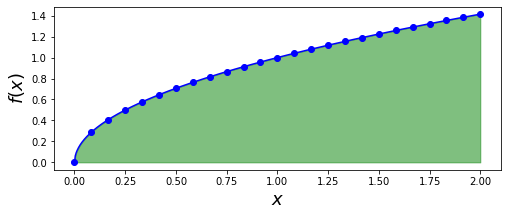

In [19]:
f = lambda x: np.sqrt(x) 
a, b = 0, 2
x = np.linspace(a, b, 25) 
y = f(x)
fig, ax = plt.subplots(figsize=(8, 3)) 
ax.plot(x, y, 'bo')
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')
ax.fill_between(xx, f(xx), color='green', alpha=0.5) 
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)

In [20]:
val_trapz = integrate.trapz(y, x) 
val_trapz

In [21]:
val_simps = integrate.simps(y, x) 
val_simps

In [22]:
val_exact = 2.0/3.0 * (b-a)**(3.0/2.0) 
val_exact
val_exact - val_trapz
val_exact - val_simps